 --- Random Walk over a discrete lattice --- 
fit with k*sqrt(x): k =  [0.93151756]
confidence over k : +-  [[0.00180401]]
 --- Random Walk over a continuum  --- 
fit with k*sqrt(x): k =  [0.93151756]
confidence over k : +-  [[0.00180401]]


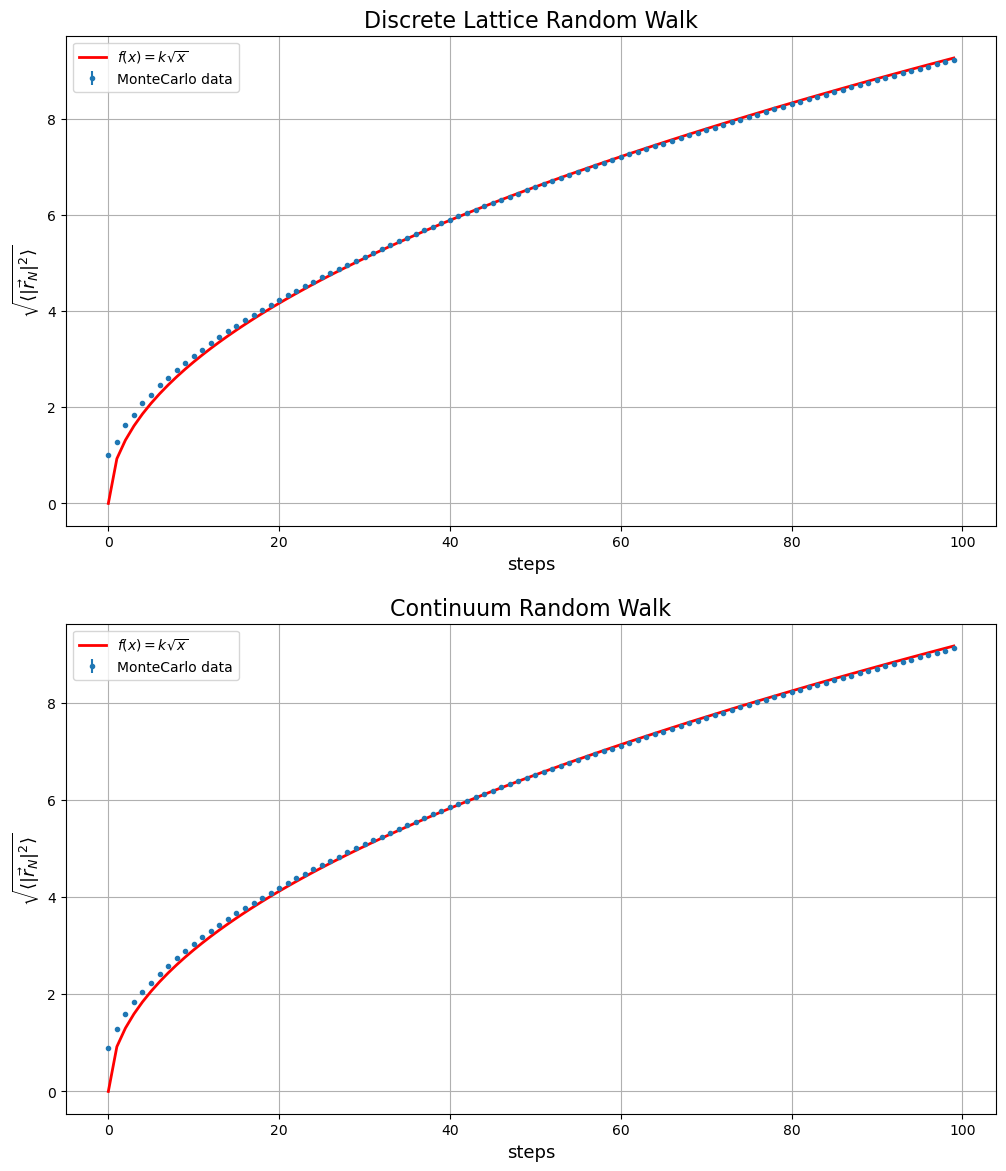

In [14]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

def f (x,k):
    return k*(x**0.5)

#loading and fitting data
yD, errD = np.loadtxt("randomwalkdiscreto.dat", usecols=(0,1), delimiter=' ', unpack=True)
x      = np.arange(yD.size)
yC, errC = np.loadtxt("randomwalkcontinuo.dat", usecols=(0,1), delimiter=' ', unpack=True)
x      = np.arange(yC.size)
#discrete fit
p_opt_disc, p_cov_disc = curve_fit(f, x, yD)
y_fit = f(x,p_opt_disc[0])

print( ' --- Random Walk over a discrete lattice --- ')
print('fit with k*sqrt(x): k = ',p_opt_disc)
print('confidence over k : +- ',np.sqrt(p_cov_disc))

#continuos fit
p_opt_cont, p_cov_cont = curve_fit(f, x, yC)
y_fit = f(x,p_opt_cont[0])

print( ' --- Random Walk over a continuum  --- ')
print('fit with k*sqrt(x): k = ',p_opt_disc)
print('confidence over k : +- ',np.sqrt(p_cov_disc))

#graphing
plt.figure(figsize=(12,14))

plt.subplot(211)
plt.errorbar(x,yD,errD,fmt='.',label='MonteCarlo data')
plt.grid(True)
plt.xlabel('steps',fontsize=13)
plt.ylabel(r'$\sqrt{\langle|\vec{r}_{N}|^2\rangle}$',fontsize=13)
plt.title("Discrete Lattice Random Walk",fontsize=16)
y_fitD = f(x,p_opt_disc)
plt.plot(x,y_fitD,'r',linewidth=2,label='$f(x)=k\sqrt{x}$') # plotting fitted function
plt.legend()

plt.subplot(212)
plt.errorbar(x,yC,errC,fmt='.',label='MonteCarlo data')
plt.grid(True)
plt.xlabel('steps',fontsize=13)
plt.ylabel(r'$\sqrt{\langle|\vec{r}_{N}|^2\rangle}$',fontsize=13)
plt.title("Continuum Random Walk",fontsize=16)
y_fitC = f(x,p_opt_cont)
plt.plot(x,y_fitC,'r',linewidth=2,label='$f(x)=k\sqrt{x}$') # plotting fitted function
plt.legend()

plt.show()